In [1]:
# https://keras.io/
import keras

E:\anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D,AveragePooling2D
from keras.utils import np_utils

from keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


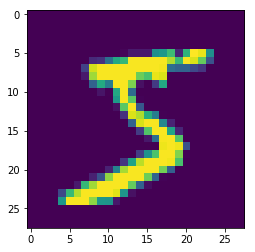

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [5]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [6]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [8]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [9]:
from keras.layers import AveragePooling2D
from keras.layers import SeparableConv2D
model = Sequential()


model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(SeparableConv2D(64, (3, 3), activation='relu'))
model.add(SeparableConv2D(64, (3, 3), activation='relu'))
model.add(SeparableConv2D(64, (3, 3), activation='relu'))
model.add(Convolution2D(32, 1, activation='relu'))
model.add(MaxPooling2D())
model.add(SeparableConv2D(32, (3, 3), activation='relu'))
model.add(SeparableConv2D(32, (3, 3), activation='relu'))
model.add(SeparableConv2D(32, (3, 3)))
model.add(SeparableConv2D(32, (3, 3)))
model.add(AveragePooling2D())
model.add(Convolution2D(10, 1))

model.add(Flatten())
model.add(Activation('softmax'))

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
separable_conv2d_1 (Separabl (None, 24, 24, 64)        2400      
_________________________________________________________________
separable_conv2d_2 (Separabl (None, 22, 22, 64)        4736      
_________________________________________________________________
separable_conv2d_3 (Separabl (None, 20, 20, 64)        4736      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 32)        2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
separable_conv2d_4 (Separabl (None, 8, 8, 32)          1344      
__________

In [11]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [12]:
model.fit(X_train, Y_train, batch_size=2048, nb_epoch=125, verbose=1)

E:\anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/125
60000/60000 [==============================] - 25s 414us/step - loss: 2.3019 - acc: 0.1086
Epoch 2/125
60000/60000 [==============================] - 17s 279us/step - loss: 2.3012 - acc: 0.1124
Epoch 3/125
60000/60000 [==============================] - 17s 279us/step - loss: 2.3012 - acc: 0.1124
Epoch 4/125
60000/60000 [==============================] - 17s 283us/step - loss: 2.3012 - acc: 0.1124
Epoch 5/125
60000/60000 [==============================] - 17s 289us/step - loss: 2.2976 - acc: 0.1125
Epoch 6/125
60000/60000 [==============================] - 17s 292us/step - loss: 1.5210 - acc: 0.5068
Epoch 7/125
60000/60000 [==============================] - 18s 294us/step - loss: 0.7056 - acc: 0.7832
Epoch 8/125
60000/60000 [==============================] - 18s 297us/step - loss: 0.4216 - acc: 0.8713
Epoch 9/125
60000/60000 [==============================] - 18s 293us/step - loss: 0.3190 - acc: 0.9028
Epoch 10/125
60000/60000 [==============================] - 18s 296us/ste

60000/60000 [==============================] - 18s 304us/step - loss: 0.0365 - acc: 0.9881
Epoch 80/125
60000/60000 [==============================] - 18s 302us/step - loss: 0.0343 - acc: 0.9891
Epoch 81/125
60000/60000 [==============================] - 18s 300us/step - loss: 0.0351 - acc: 0.9887
Epoch 82/125
60000/60000 [==============================] - 18s 297us/step - loss: 0.0344 - acc: 0.9888
Epoch 83/125
60000/60000 [==============================] - 18s 300us/step - loss: 0.0335 - acc: 0.9891
Epoch 84/125
60000/60000 [==============================] - 18s 299us/step - loss: 0.0335 - acc: 0.9892
Epoch 85/125
60000/60000 [==============================] - 18s 300us/step - loss: 0.0329 - acc: 0.9895
Epoch 86/125
60000/60000 [==============================] - 18s 301us/step - loss: 0.0319 - acc: 0.9901
Epoch 87/125
60000/60000 [==============================] - 18s 301us/step - loss: 0.0320 - acc: 0.9899
Epoch 88/125
60000/60000 [==============================] - 18s 300us/step - 